In [1]:
import numpy as np
from matplotlib import patches, pyplot as plt
from scipy import stats
from iminuit import Minuit

In [2]:

def get_entropy(p) :
    if type(p) != np.ndarray :
        p = np.array(p)
    p = np.where(p==0, 1, p)
    plogp = p * -np.log(p)
    return np.sum(plogp.flatten())


In [3]:

distributions = [
    [0, 0, 0, 1, 0, 0, 0] ,
    [0, 0, 0.05, 0.8, 0.15, 0, 0] ,
    [0, 0.05, 0.1, 0.5, 0.2, 0.1, 0.05] ,
    [.19, .10, .16, .13, .07, .23, .12],
    np.ones((7,))/7
]

num_axes = len(distributions)


In [4]:

def draw_axis(ax, p, ymax=1, label_yaxis=True) :
    num_x = len(p)
    x = np.concatenate([[x-0.5,x-0.5] for x in range(num_x+1)])
    y = np.concatenate([[0], np.concatenate([[px,px] for px in p]), [0]])
    ax.plot(x, y, "-", lw=3, c="darkblue")
    ax.fill_between(x, 0, y, lw=0, fc="royalblue")
    ax.set_xlim([x[0], x[-1]])
    ax.set_ylim([0, ymax*1.3])
    ax.tick_params(axis="both", which="both", direction="in", right=True, top=True, labelsize=14)
    ax.text(.5, .96, f"$H(p) = {get_entropy(p):.2f}$", fontsize=15, transform=ax.transAxes, ha="center", va="top")
    ax.set_xlabel(r"$x$", rotation=0, labelpad=15, fontsize=18)
    if label_yaxis :
        ax.set_ylabel(r"$p(x)$", rotation=0, labelpad=50, fontsize=18)
    else :
        ax.yaxis.set_ticklabels([])
        

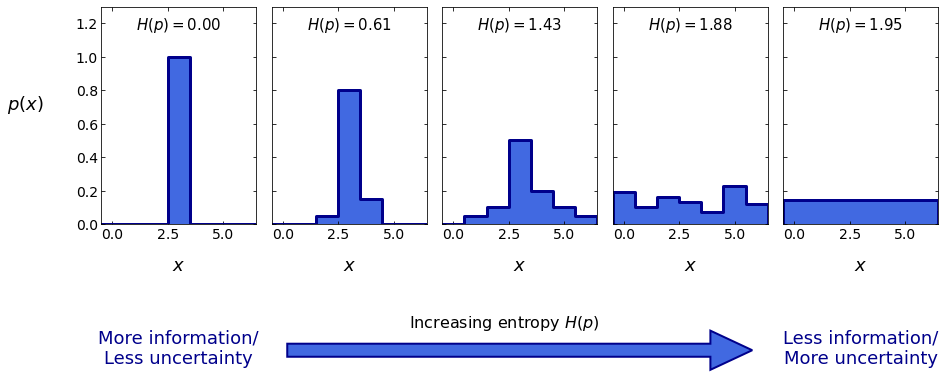

In [5]:

fig = plt.figure(figsize=(3*num_axes,4))

axes = []
for ax_idx, p in enumerate(distributions) :
    ax = fig.add_subplot(1, num_axes, 1+ax_idx)
    draw_axis(ax, p, label_yaxis=not ax_idx)
    axes.append(ax)

fig.subplots_adjust(wspace=0.1)

axes[0 ].text(0.5, -0.48, "More information/\nLess uncertainty", transform=axes[0 ].transAxes, ha="center", 
              c="darkblue", va="top", fontsize=18)
axes[-1].text(0.5, -0.48, "Less information/\nMore uncertainty", transform=axes[-1].transAxes, ha="center", 
              c="darkblue", va="top", fontsize=18)

axes[0].arrow(1.2, -0.58, 3, 0, length_includes_head=True, shape="full", clip_on=False, transform=axes[0].transAxes,
              width=0.06, fc="royalblue", ec="darkblue", lw=2)
axes[0].text(2.6, -0.5, "Increasing entropy $H(p)$", transform=axes[0].transAxes, ha="center", va="bottom", fontsize=16)

fig.savefig("entropy_of_distributions.pdf", bbox_inches="tight")
plt.show(fig)
plt.close(fig)


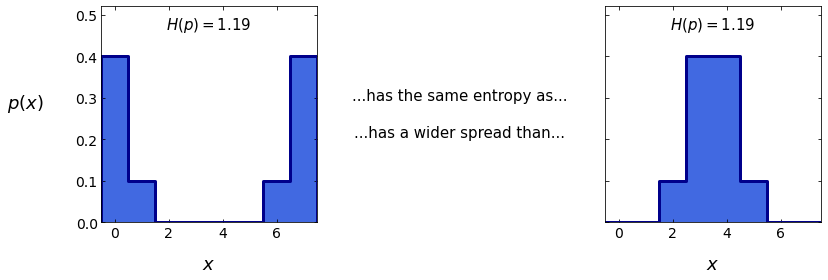

In [6]:

fig = plt.figure(figsize=(10,3))

ax_width = 0.3
ax1 = fig.add_axes([0         , 0, ax_width, 1])
ax2 = fig.add_axes([1-ax_width, 0, ax_width, 1])

draw_axis(ax1, [0.4, 0.1, 0, 0, 0, 0, 0.1, 0.4], ymax=0.4)
draw_axis(ax2, [0, 0, 0.1, 0.4, 0.4, 0.1, 0, 0], ymax=0.4, label_yaxis=False)

ax1.text(1.66, 0.55, "...has the same entropy as...", transform=ax1.transAxes, fontsize=15, ha="center", va="bottom")
ax1.text(1.66, 0.45, "...has a wider spread than...", transform=ax1.transAxes, fontsize=15, ha="center", va="top")

fig.savefig("entropy_is_structure_independent.pdf", bbox_inches="tight")
plt.show(fig)
plt.close(fig)


p = 2e-07  5e-07  1e-06  2e-06  4e-06  7e-06  1e-05  2e-05  4e-05  8e-05  0.0001  0.0002  0.0003  0.0005  0.0008  0.001  0.002  0.003  0.004  0.005  0.007  0.009  0.01  0.02  0.02  0.02  0.03  0.03  0.03  0.04  0.04  0.04  0.04  0.04  0.04  0.04  0.04  0.04  0.03  0.03  0.03  0.02  0.02  0.01  0.01  0.009  0.007  0.005  0.004  0.003  0.002  0.002  0.002  0.003  0.003  0.004  0.005  0.006  0.007  0.008  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.009  0.008  0.006  0.005  0.004  0.003  0.002  0.002  0.001  0.0009  0.0006  0.0004  0.0003  0.0002  0.0001  7e-05  4e-05  3e-05  1e-05  8e-06  5e-06  2e-06  1e-06  7e-07  3e-07  2e-07  8e-08

logp = -15.2  -14.5  -13.8  -13.1  -12.4  -11.8  -11.2  -10.6  -10.0  -9.5  -9.0  -8.5  -8.0  -7.5  -7.1  -6.7  -6.3  -5.9  -5.6  -5.3  -5.0  -4.7  -4.4  -4.2  -4.0  -3.8  -3.6  -3.5  -3.4  -3.3  -3.2  -3.1  -3.1  -3.1  -3.1  -3.2  -3.2  -3.3  -3.4  -3.5  -3.7  -3.9  -4.0  -4.3  -4.5  -4.8  -5.0  -5.3  -5.6  -5.8  -6.0 

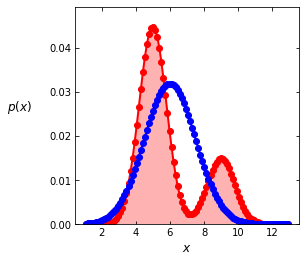

In [7]:
f1 = 0.75
m1, s1 = 5, .8
m2, s2 = 9, .8
num_bins = 100

x_min = min([m1-5*s1, m2-5*s2])
x_max = max([m1+5*s1, m2+5*s2])
bins  = np.linspace(x_min, x_max, num_bins+1)
bin_centres = 0.5*(bins[1:]+bins[:-1])

def get_p(x) :
    return f1*stats.norm.pdf(x, loc=m1, scale=s1) + (1-f1)*stats.norm.pdf(x, loc=m2, scale=s2)

def get_p_cdf(x) :
    return f1*stats.norm.cdf(x, loc=m1, scale=s1) + (1-f1)*stats.norm.cdf(x, loc=m2, scale=s2)

def get_binned_p() :
    return get_p_cdf(bins[1:]) - get_p_cdf(bins[:-1])

def get_q(x, mq, sq) :
    return stats.norm.pdf(x, loc=mq, scale=sq)

def get_q_cdf(x, mq, sq) :
    return stats.norm.cdf(x, loc=mq, scale=sq)

def get_binned_q(mq, sq) :
    return get_q_cdf(bins[1:], mq, sq) - get_q_cdf(bins[:-1], mq, sq)

p     = get_binned_p()
logp  = np.log(p)
plogp = p*logp
q     = get_binned_q(6, 1.5)

print(f"p = {'  '.join([f'{pp:.1}' for pp in p])}")
print(f"\nlogp = {'  '.join([f'{pp:.1f}' for pp in logp])}")

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("$x$", fontsize=12)
ax.set_ylabel("$p(x)$", fontsize=12, rotation=0, labelpad=30)
ax.axhline(0, ls="-", lw=1, c="gray")
ax.plot(bin_centres, p, "o-", c="r", lw=2)
ax.plot(bin_centres, q, "o-", c="b", lw=2)
ax.fill_between(bin_centres, p, lw=0, fc="r", alpha=0.3)
ax.tick_params(axis="both", which="both", right=True, top=True, direction="in")
ax.set_ylim([0, 1.1*np.max([p.max(), q.max()])])
plt.show()
plt.close(fig)

In [8]:

def get_KL(p, q) :
    D = p * (np.log(p) - np.log(q))
    D = np.where(np.isfinite(D), D, 0)
    return D.sum()

def get_KL_incl(p, q) :
    return get_KL(p, q)

def get_KL_excl(p, q) :
    return get_KL(q, p)


In [9]:

mq_scan = np.linspace(3, 10, 201)
sq_scan = np.linspace(0.2, 3, 201)

print(f"mq between {mq_scan[0]:.1f} and {mq_scan[-1]:.1f}")
print(f"sq between {sq_scan[0]:.1f} and {sq_scan[-1]:.1f}")

mq_grid, sq_grid = np.meshgrid(mq_scan, sq_scan, indexing='ij')

print(f"grid shape is {mq_grid.shape}")

KL_incl = np.zeros_like(mq_grid)
KL_excl = np.zeros_like(mq_grid)

for x in range(mq_scan.shape[0]) :
    for y in range(sq_scan.shape[0]) :
        q = get_binned_q(mq_grid[x,y], sq_grid[x,y])
        KL_incl[x,y] = get_KL_incl(p, q)
        KL_excl[x,y] = get_KL_excl(p, q)
    
print(f"KL_incl between {KL_incl.min():.1f} and {KL_incl.max():.1f}")
print(f"KL_excl between {KL_excl.min():.1f} and {KL_excl.max():.1f}")


mq between 3.0 and 10.0
sq between 0.2 and 3.0
grid shape is (201, 201)


/var/folders/6_/gprzxt797d5098h8dtk22nch0000gn/T/ipykernel_42547/2791722254.py:2: RuntimeWarning: divide by zero encountered in log
  D = p * (np.log(p) - np.log(q))
/var/folders/6_/gprzxt797d5098h8dtk22nch0000gn/T/ipykernel_42547/2791722254.py:2: RuntimeWarning: invalid value encountered in multiply
  D = p * (np.log(p) - np.log(q))


KL_incl between 0.3 and 239.0
KL_excl between 0.3 and 4.3


In [10]:
best_idx_KL_incl = np.unravel_index(np.argmin(KL_incl, axis=None), KL_incl.shape)
best_mq_KL_incl, best_sq_KL_incl = mq_grid[best_idx_KL_incl], sq_grid[best_idx_KL_incl]
print(f"When using KL_incl we find mq = {best_mq_KL_incl:.2f}, sq = {best_sq_KL_incl:.2f}")

best_idx_KL_excl = np.unravel_index(np.argmin(KL_excl, axis=None), KL_excl.shape)
best_mq_KL_excl, best_sq_KL_excl = mq_grid[best_idx_KL_excl], sq_grid[best_idx_KL_excl]
print(f"When using KL_excl we find mq = {best_mq_KL_excl:.2f}, sq = {best_sq_KL_excl:.2f}")

When using KL_incl we find mq = 6.01, sq = 1.91
When using KL_excl we find mq = 5.03, sq = 0.84


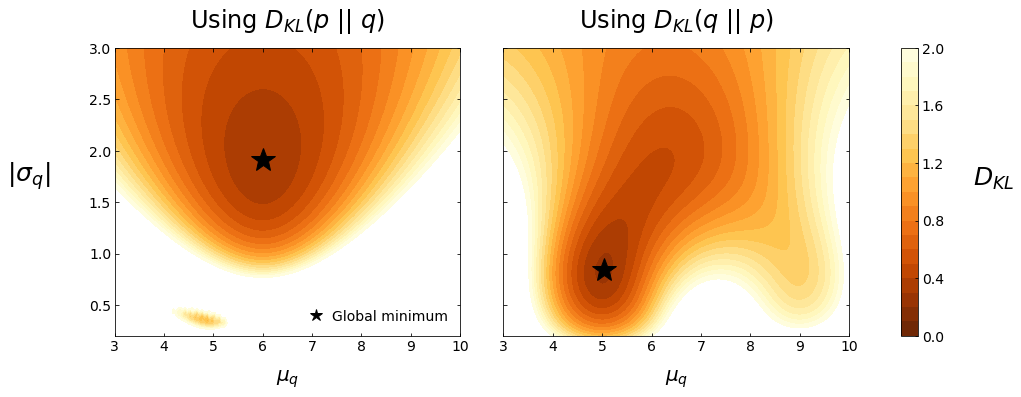

In [11]:

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_axes([0, 0, 0.4, 1])
ax1.contourf(mq_grid, sq_grid, KL_incl, levels=np.linspace(0, 2, 21), cmap="YlOrBr_r")
ax1.tick_params(axis="both", which="both", right=True, top=True, direction="in", labelsize=14)
ax1.set_ylabel(r"$\left|\sigma_q\right|$", rotation=0, fontsize=25, labelpad=60, va="bottom")
ax1.set_xlabel(r"$\mu_q$", rotation=0, fontsize=20, labelpad=15)
ax1.plot(best_mq_KL_incl, best_sq_KL_incl, "*", ms=25, c="k", label="Global minimum")
ax1.set_title(r"Using $D_{KL}(p~||~q)$", fontsize=24, pad=20)
ax1.legend(loc="lower right", frameon=False, fontsize=14, markerscale=0.5, handletextpad=0.1)

ax2 = fig.add_axes([0.45, 0, 0.4, 1])
con = ax2.contourf(mq_grid, sq_grid, KL_excl, levels=np.linspace(0, 2, 21), cmap="YlOrBr_r")
ax2.tick_params(axis="both", which="both", right=True, top=True, direction="in", labelsize=14)
ax2.yaxis.set_ticklabels([])
ax2.set_xlabel(r"$\mu_q$", rotation=0, fontsize=20, labelpad=15)
ax2.plot(best_mq_KL_excl, best_sq_KL_excl, "*", ms=25, c="k")
ax2.set_title(r"Using $D_{KL}(q~||~p)$", fontsize=24, pad=20)

ax3 = fig.add_axes([0.91, 0, 0.02, 1])
plt.colorbar(con, cax=ax3)
ax3.tick_params(axis="both", which="both", right=True, top=True, direction="in", labelsize=14)
ax3.set_yticks(np.linspace(0, 2, 6))
ax3.set_ylabel(r"$D_{KL}$", rotation=0, fontsize=25, labelpad=50, va="bottom")

fig.savefig("inclusive_vs_exclusive_KL_divergence_loss.pdf", bbox_inches="tight")
plt.show(fig)
plt.close(fig)


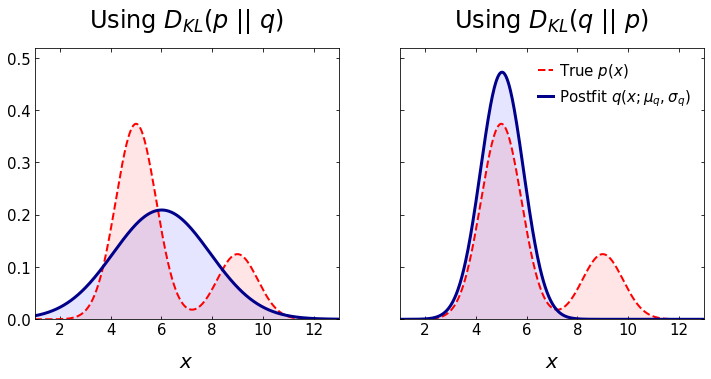

In [12]:

x = np.linspace(x_min, x_max, 501)
p = get_p(x)
q_KL_incl = get_q(x, best_mq_KL_incl, best_sq_KL_incl)
q_KL_excl = get_q(x, best_mq_KL_excl, best_sq_KL_excl)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.tick_params(axis="both", which="both", right=True, top=True, direction="in", labelsize=15)
ax1.set_xlabel(r"$x$", rotation=0, fontsize=20, labelpad=15)
ax1.plot(x, p, "--", lw=2, c="r", label="$p(x)$")
ax1.fill_between(x, p, lw=0, fc="r", alpha=0.1)
ax1.plot(x, q_KL_incl, "-", lw=3, c="darkblue", label="$q(x)$")
ax1.fill_between(x, q_KL_incl, lw=0, fc="blue", alpha=0.1)
ax1.set_title(r"Using $D_{KL}(p~||~q)$", fontsize=24, pad=20)
ax1.set_xlim([x[0], x[-1]])
ax1.set_ylim([0, 1.1*np.max([p.max(), q_KL_incl.max(), q_KL_excl.max()])])

ax2 = fig.add_subplot(1, 2, 2)
ax2.tick_params(axis="both", which="both", right=True, top=True, direction="in", labelsize=15)
ax2.set_xlabel(r"$x$", rotation=0, fontsize=20, labelpad=15)
ax2.yaxis.set_ticklabels([])
ax2.plot(x, p, "--", lw=2, c="r", label="True $p(x)$")
ax2.fill_between(x, p, lw=0, fc="r", alpha=0.1)
ax2.plot(x, q_KL_excl, "-", lw=3, c="darkblue", label="Postfit $q(x; \mu_q, \sigma_q)$")
ax2.fill_between(x, q_KL_excl, lw=0, fc="blue", alpha=0.1)
ax2.set_title(r"Using $D_{KL}(q~||~p)$", fontsize=24, pad=20)
ax2.legend(loc="upper right", frameon=False, fontsize=15, handlelength=1, handletextpad=0.4)
ax2.set_xlim([x[0], x[-1]])
ax2.set_ylim([0, 1.1*np.max([p.max(), q_KL_incl.max(), q_KL_excl.max()])])

fig.subplots_adjust(wspace=0.2)

fig.savefig("inclusive_vs_exclusive_KL_divergence_pdf.pdf", bbox_inches="tight")
plt.show(fig)
plt.close(fig)


In [13]:
X = np.random.normal(size=(int(1e6),))
Y_example1 = np.random.normal(size=X.shape)
Y_example2 = X.copy()
Y_example3 = np.random.choice([-1,1], size=X.shape)*X

r        = 2.5
theta    = np.random.uniform(size=(int(1e6),), high=np.pi, low=-np.pi)
X_circle = r*np.cos(theta)
Y_circle = r*np.sin(theta)

bins_X, bins_Y = np.linspace(-3, 3, 21), np.linspace(-3, 3, 21)
pX   = np.histogram(X, bins=bins_X)[0].astype(dtype=float)
pX  /= pX.sum()
pY1  = np.histogram(Y_example1, bins=bins_Y)[0].astype(dtype=float)
pY1 /= pY1.sum()
pY2  = np.histogram(Y_example2, bins=bins_Y)[0].astype(dtype=float)
pY2 /= pY2.sum()
pY3  = np.histogram(Y_example3, bins=bins_Y)[0].astype(dtype=float)
pY3 /= pY3.sum()
pXc  = np.histogram(X_circle, bins=bins_X)[0].astype(dtype=float)
pXc /= pXc.sum()
pYc  = np.histogram(Y_circle, bins=bins_Y)[0].astype(dtype=float)
pYc /= pYc.sum()

print(f"H(X ) = {get_entropy(pX):.2f}")
print(f"H(Y1) = {get_entropy(pY1):.2f}")
print(f"H(Y2) = {get_entropy(pY2):.2f}")
print(f"H(Y3) = {get_entropy(pY3):.2f}")
print(f"H(Xc) = {get_entropy(pXc):.2f}")
print(f"H(Yc) = {get_entropy(pYc):.2f}")


H(X ) = 2.61
H(Y1) = 2.61
H(Y2) = 2.61
H(Y3) = 2.61
H(Xc) = 2.83
H(Yc) = 2.83


/var/folders/6_/gprzxt797d5098h8dtk22nch0000gn/T/ipykernel_42547/3655844276.py:9: RuntimeWarning: divide by zero encountered in log
  Iij = np.where(pXY>0, pXY*(np.log(pXY) - np.log(p_u)), 0)
/var/folders/6_/gprzxt797d5098h8dtk22nch0000gn/T/ipykernel_42547/3655844276.py:9: RuntimeWarning: invalid value encountered in multiply
  Iij = np.where(pXY>0, pXY*(np.log(pXY) - np.log(p_u)), 0)
/var/folders/6_/gprzxt797d5098h8dtk22nch0000gn/T/ipykernel_42547/3655844276.py:9: RuntimeWarning: invalid value encountered in subtract
  Iij = np.where(pXY>0, pXY*(np.log(pXY) - np.log(p_u)), 0)


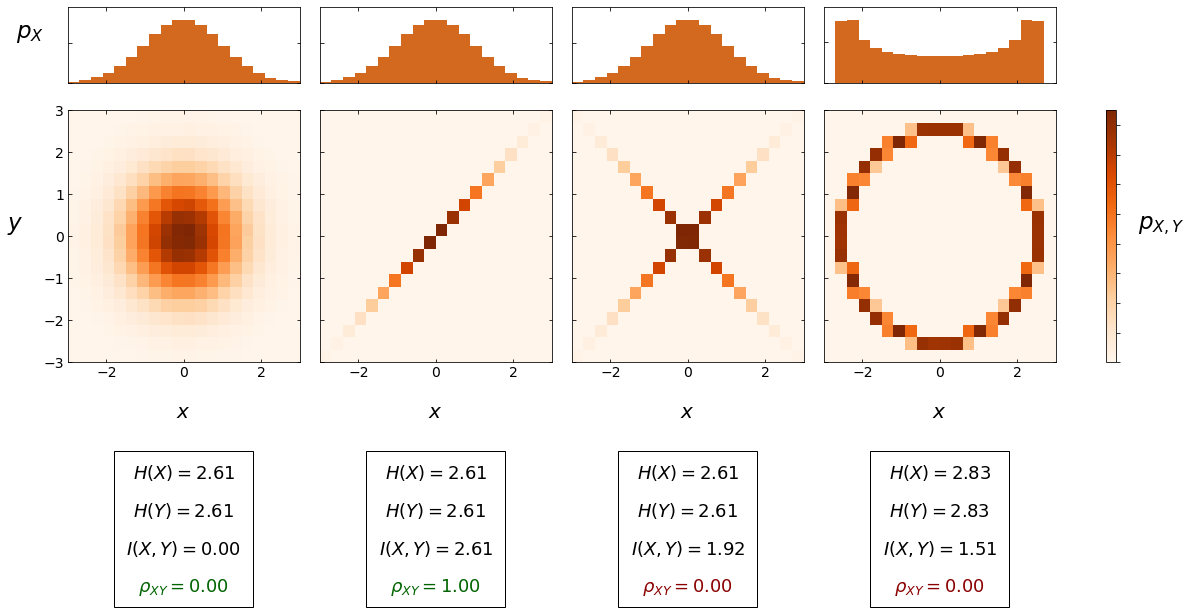

In [14]:
    
def get_mutual_information(hist2d) :
    hist2d = hist2d.astype(dtype=float)
    pX  = hist2d.sum(axis=0)
    pX /= pX.sum()
    pY  = hist2d.sum(axis=1)
    pY /= pY.sum()
    pXY = hist2d / hist2d.sum()
    p_u = pX[None,:] * pY[:,None]
    Iij = np.where(pXY>0, pXY*(np.log(pXY) - np.log(p_u)), 0)
    Hx  = get_entropy(pX)
    Hy  = get_entropy(pY)
    return Hx, Hy, Iij.sum()

def plot_axis(axl, axu, X, Y, draw_yaxis=True, cax=None, pearson_color="k") :
    axu.tick_params(axis="both", which="both", right=True, top=True, direction="in", labelsize=14)
    hvals, _, _ = axu.hist(X, bins=bins_X, color="chocolate", density=True)
    axu.xaxis.set_ticklabels([])
    axu.yaxis.set_ticklabels([])
    axu.set_xlim([bins_X[0], bins_X[-1]])
    axu.set_ylim([0, 1.2*hvals.max()])
    axl.tick_params(axis="both", which="both", right=True, top=True, direction="in", labelsize=14)
    hist = axl.hist2d(X, Y, bins=(bins_X, bins_Y), cmap="Oranges")
    axl.set_xlabel("$x$", fontsize=20, labelpad=23, rotation=0, va="top")
    if not draw_yaxis :
        axl.yaxis.set_ticklabels([])
    else :
        axu.set_ylabel("$p_X$", fontsize=23, labelpad=20, rotation=0, va="bottom", ha="right")
        axl.set_ylabel("$y$", fontsize=23, labelpad=20, rotation=0, va="bottom", ha="right")
    axl.set_xlim([-3, 3])
    axl.set_ylim([-3, 3])
    if cax :
        plt.colorbar(hist[3], cax)
        cax.yaxis.set_ticklabels([])
        cax.set_ylabel("$p_{X,Y}$", fontsize=23, rotation=0, va="bottom", ha="left", labelpad=15)
    Hx, Hy, I = get_mutual_information(hist[0])
    corr = np.fabs(np.corrcoef(X, Y)[0,1])
    axl.text(0.5, -0.40, f"$H(X)={Hx:.2f}$", va="top", ha="center", transform=axl.transAxes, fontsize=18)
    axl.text(0.5, -0.55, f"$H(Y)={Hy:.2f}$", va="top", ha="center", transform=axl.transAxes, fontsize=18)
    axl.text(0.5, -0.70, f"$I(X,Y)={I:.2f}$", va="top", ha="center", transform=axl.transAxes, fontsize=18)
    axl.text(0.5, -0.85, r"$\rho_{XY}="+f"{corr:.2f}$", va="top", ha="center", transform=axl.transAxes, 
            color=pearson_color, fontsize=18)
    rect = patches.Rectangle((0.2, -0.35), 0.6, -0.62, linewidth=1, edgecolor='k', facecolor='none', 
                             transform=axl.transAxes, clip_on=False)
    axl.add_patch(rect)
    
fig = plt.figure(figsize=(14,3.5))

ax1 = fig.add_axes([0.00, 0, 0.23, 1])
ax2 = fig.add_axes([0.25, 0, 0.23, 1])
ax3 = fig.add_axes([0.50, 0, 0.23, 1])
ax4 = fig.add_axes([0.75, 0, 0.23, 1])
cax = fig.add_axes([1.03, 0, 0.01, 1])

ax5 = fig.add_axes([0.00, 1.11, 0.23, 0.3])
ax6 = fig.add_axes([0.25, 1.11, 0.23, 0.3])
ax7 = fig.add_axes([0.50, 1.11, 0.23, 0.3])
ax8 = fig.add_axes([0.75, 1.11, 0.23, 0.3])

plot_axis(ax1, ax5, X, Y_example1, pearson_color="darkgreen", draw_yaxis=True)
plot_axis(ax2, ax6, X, Y_example2, pearson_color="darkgreen", draw_yaxis=False)
plot_axis(ax3, ax7, X, Y_example3, pearson_color="darkred", draw_yaxis=False)
plot_axis(ax4, ax8, X_circle, Y_circle, pearson_color="darkred", draw_yaxis=False, cax=cax)

fig.savefig("mutual_information_vs_pearson.pdf", bbox_inches="tight")
plt.show(fig)
plt.close(fig)